In [2]:
import random
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

%matplotlib inline

Using TensorFlow backend.


In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

5


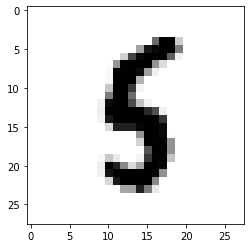

In [4]:
# Show an example image from the training data along with its label
index = int(random.random()*len(x_train))
print(y_train[index])
plt.imshow(x_train[index], cmap='Greys')

In [5]:
# 60k training examples, 28 x 28 pixel images
print(x_train.shape)
# 10k testing examples
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
# Reshape, only one layer (grayscale)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
input_shape = (28, 28, 1)

In [8]:
# Normalize
x_train /= 255.0
x_test /= 255.0

In [63]:
# Create model - convolution, pooling, flatten, relu, dropout, softmax
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [64]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 176us/step - loss: 0.1975 - accuracy: 0.9414
Epoch 2/5
60000/60000 [==============================] - 10s 171us/step - loss: 0.0827 - accuracy: 0.9743
Epoch 3/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.0551 - accuracy: 0.9826
Epoch 4/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.0413 - accuracy: 0.9870
Epoch 5/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.0327 - accuracy: 0.9894


In [65]:
# Pretty much the same despite having twice as many neurons in the second to last layer
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 74us/step


[0.053561915939213944, 0.9830999970436096]

Prediction: 2
Actual: 2


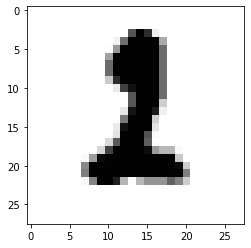

In [139]:
# Show an example image from the training data along with its label
# and its predicted label from the model
index = int(random.random()*len(x_test))
pred = model.predict(x_test[index].reshape(1, 28, 28, 1))
print('Prediction: {}'.format(pred.argmax()))
print('Actual: {}'.format(y_test[index]))
plt.imshow(x_test[index].reshape(28, 28), cmap='Greys')
# Looks like a 1 to me...

In [13]:
# Verify CUDA installation and compare GPU training speed to CPU
with tf.device('/CPU:0'):
    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
    model.fit(x=x_train, y=y_train, epochs=1)
with tf.device('/GPU:0'):
    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
    model.fit(x=x_train, y=y_train, epochs=1)
# I don't have a great GPU, but it's better than nothing.

Epoch 1/1
60000/60000 [==============================] - 19s 315us/step - loss: 0.0252 - accuracy: 0.9912
Epoch 1/1
60000/60000 [==============================] - 10s 160us/step - loss: 0.0234 - accuracy: 0.9922


In [153]:
#Try some different architectures
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, padding='same', activation=tf.nn.relu))
model2.add(Conv2D(64, kernel_size=(3,3), padding='same', activation=tf.nn.relu))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(64, activation=tf.nn.relu))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation=tf.nn.softmax))

In [154]:
model2.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model2.fit(x=x_train, y=y_train, epochs=5, batch_size=512)

Epoch 1/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.5017 - accuracy: 0.8469
Epoch 2/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.1613 - accuracy: 0.9537
Epoch 3/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.1194 - accuracy: 0.9651
Epoch 4/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.0991 - accuracy: 0.9695
Epoch 5/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.0839 - accuracy: 0.9757


In [155]:
# Barely better
model2.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 142us/step


[0.03603210315018077, 0.9883999824523926]

In [156]:
model3 = Sequential()
model3.add(Dropout(0.1))
model3.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, padding='same', activation=tf.nn.relu))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(32, kernel_size=(3,3), padding='same', activation=tf.nn.relu))
model3.add(Flatten())
model3.add(Dropout(0.2))
model3.add(Dense(64, activation=tf.nn.relu))
model3.add(Dropout(0.25))
model3.add(Dense(10, activation=tf.nn.softmax))

In [159]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model3.fit(x=x_train, y=y_train, epochs=10, batch_size=512)

Epoch 1/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0795 - accuracy: 0.9755
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0707 - accuracy: 0.9783
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0639 - accuracy: 0.9800
Epoch 4/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0578 - accuracy: 0.9819
Epoch 5/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0532 - accuracy: 0.9829
Epoch 6/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0469 - accuracy: 0.9853
Epoch 7/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0440 - accuracy: 0.9864
Epoch 8/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0413 - accuracy: 0.9868
Epoch 9/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0390 - accuracy: 0.9871
Epoch 10/10
60000/60000 [==============================

In [160]:
#This one was much faster, and slightly better.
model3.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 106us/step


[0.028460302224976475, 0.9907000064849854]